   id  key action  rhythm  dwell_time  flight_time  up_down_time  \
0 NaN  NaN    NaN     NaN         NaN          NaN           NaN   
1 NaN  NaN    NaN     NaN         NaN          NaN           NaN   
2 NaN  NaN    NaN     NaN         NaN          NaN           NaN   
3 NaN  NaN    NaN     NaN         NaN          NaN           NaN   
4 NaN  NaN    NaN     NaN         NaN          NaN           NaN   

   session_duration  user_id timestamp  
0               NaN      NaN       NaN  
1               NaN      NaN       NaN  
2               NaN      NaN       NaN  
3               NaN      NaN       NaN  
4               NaN      NaN       NaN  
Missing Values:
 id                  3067
key                 3358
action              3067
rhythm              3067
dwell_time          3358
flight_time         3358
up_down_time        3358
session_duration    3484
user_id             3404
timestamp           3067
dtype: int64
Percentage of Missing Values:
 id                  13.298357
key 

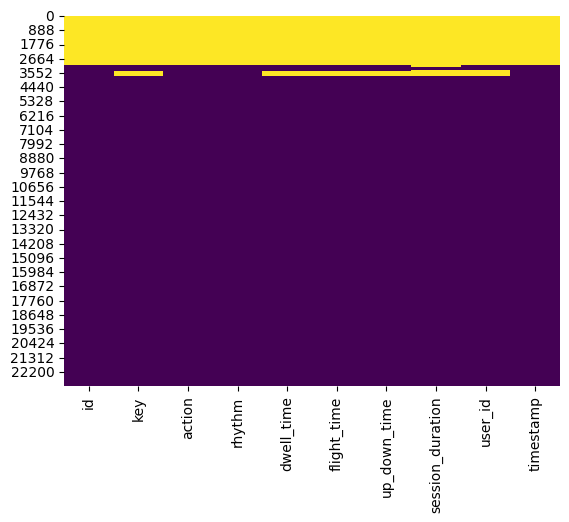

In [1]:
import pandas as pd

# Load the keystroke dataset
keystroke_data = pd.read_csv('logger_keystrokelog_modified.csv')

# Display the first few rows to inspect the data
print(keystroke_data.head())

# Check for missing values across columns
missing_values = keystroke_data.isnull().sum()

# Percentage of missing data in each column
missing_percentage = (missing_values / len(keystroke_data)) * 100

# Print out the missing values and their percentage
print("Missing Values:\n", missing_values)
print("Percentage of Missing Values:\n", missing_percentage)

# Visualize missing data
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(keystroke_data.isnull(), cbar=False, cmap='viridis')
plt.show()


In [2]:
# Count the number of rows and columns
total_rows, total_columns = keystroke_data.shape
print(f"Total Rows: {total_rows}, Total Columns: {total_columns}")

# Count rows with completely null values (where all columns are null)
complete_null_rows = keystroke_data.isnull().all(axis=1).sum()

# Count rows with at least 3 non-null values
non_null_rows = keystroke_data.notnull().sum(axis=1) >= 3
rows_with_at_least_3_values = non_null_rows.sum()

# Output the counts
print(f"Rows with complete null values: {complete_null_rows}")
print(f"Rows with at least 3 non-null values: {rows_with_at_least_3_values}")


Total Rows: 23063, Total Columns: 10
Rows with complete null values: 3067
Rows with at least 3 non-null values: 19996


In [3]:
import pandas as pd

# Load the dataset
keystroke_data = pd.read_csv('logger_keystrokelog_modified.csv')  # Change path if needed

# Check the initial number of rows and columns
print(f"Total Rows: {keystroke_data.shape[0]}, Total Columns: {keystroke_data.shape[1]}")

# Count rows with complete null values and rows with at least 3 non-null values
rows_with_complete_null = keystroke_data.isnull().all(axis=1).sum()
rows_with_at_least_3_non_null = keystroke_data.notnull().sum(axis=1).ge(3).sum()

print(f"Rows with complete null values: {rows_with_complete_null}")
print(f"Rows with at least 3 non-null values: {rows_with_at_least_3_non_null}")

# Remove rows with complete null values
cleaned_data = keystroke_data.dropna(how='all')

# Save the cleaned dataset to a new CSV file
cleaned_data.to_csv('cleaned_keystroke_data.csv', index=False)

# Confirm the cleaning
print(f"Cleaned dataset saved to 'cleaned_keystroke_data.csv'. Total Rows after cleaning: {cleaned_data.shape[0]}")


Total Rows: 23063, Total Columns: 10
Rows with complete null values: 3067
Rows with at least 3 non-null values: 19996
Cleaned dataset saved to 'cleaned_keystroke_data.csv'. Total Rows after cleaning: 19996


In [4]:
import pandas as pd

# Load the cleaned dataset
cleaned_data = pd.read_csv('cleaned_keystroke_data.csv')

# Display all columns and data in the dataset
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', None)  # Display all rows (use with caution for large datasets)

# Show the first few rows of the cleaned dataset
print(cleaned_data.head())

# If you want to display the entire dataset, you can use this:
print(cleaned_data)


       id        key   action  rhythm  dwell_time  flight_time  up_down_time  \
0  3067.0          1  release     0.0    0.152503     1.788202      1.788202   
1  3068.0  Key.enter  release     0.0    0.084759     0.000000      0.000000   
2  3069.0          b  release     0.0    0.055941     0.108629      0.108629   
3  3070.0          z  release     0.0    0.150086     0.019156      0.019156   
4  3071.0          t  release     0.0    0.067397     0.154120      0.154120   

   session_duration  user_id                      timestamp  
0               NaN      1.0  2025-01-15 10:08:05.783485+00  
1               NaN      1.0  2025-01-15 10:08:05.793162+00  
2               NaN      1.0  2025-01-15 10:25:53.170786+00  
3               NaN      1.0  2025-01-15 10:25:53.182156+00  
4               NaN      1.0   2025-01-15 10:25:53.18817+00  


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [6]:
# Check the columns of the cleaned dataset
print(cleaned_data.columns)


Index(['id', 'key', 'action', 'rhythm', 'dwell_time', 'flight_time',
       'up_down_time', 'session_duration', 'user_id', 'timestamp'],
      dtype='object')


In [10]:
from sklearn.impute import SimpleImputer

# 1. Separate numeric and categorical columns
numeric_columns = cleaned_data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = cleaned_data.select_dtypes(include=['object']).columns

# 2. Impute missing values for numeric columns (using mean)
numeric_imputer = SimpleImputer(strategy='mean')
cleaned_data[numeric_columns] = numeric_imputer.fit_transform(cleaned_data[numeric_columns])

# 3. Impute missing values for categorical columns (using the most frequent value)
categorical_imputer = SimpleImputer(strategy='most_frequent')
cleaned_data[categorical_columns] = categorical_imputer.fit_transform(cleaned_data[categorical_columns])

# 4. Save the imputed dataset to a new CSV file
cleaned_data.to_csv('imputed_keystroke_data.csv', index=False)

# 5. Show information about the imputed dataset
print("Imputed dataset saved to 'imputed_keystroke_data.csv'.")
print("Missing Values after Imputation:")
print(cleaned_data.isnull().sum())


Imputed dataset saved to 'imputed_keystroke_data.csv'.
Missing Values after Imputation:
id                  0
key                 0
action              0
rhythm              0
dwell_time          0
flight_time         0
up_down_time        0
session_duration    0
user_id             0
timestamp           0
dtype: int64


In [12]:
# Print the column names of the imputed dataset
print(imputed_data.columns)


Index(['id', 'key', 'action', 'rhythm', 'dwell_time', 'flight_time',
       'up_down_time', 'session_duration', 'user_id', 'timestamp'],
      dtype='object')


In [13]:
# 1. Load the imputed dataset
imputed_data = pd.read_csv('imputed_keystroke_data.csv')

# 2. Define the thresholds for genuine data based on multiple columns (dwell_time, flight_time, etc.)
# You can adjust these ranges based on your understanding of the data

# Example thresholds (you should analyze the data to set sensible values):
dwell_time_threshold = (0.05, 0.2)  # Assume genuine dwell_time is between 0.05 and 0.2
flight_time_threshold = (0.1, 2.0)  # Assume genuine flight_time is between 0.1 and 2.0

# 3. Filter genuine data based on these thresholds
genuine_data = imputed_data[
    (imputed_data['dwell_time'] >= dwell_time_threshold[0]) & 
    (imputed_data['dwell_time'] <= dwell_time_threshold[1]) & 
    (imputed_data['flight_time'] >= flight_time_threshold[0]) &
    (imputed_data['flight_time'] <= flight_time_threshold[1])
]

# 4. Separate features (X) for training (exclude non-feature columns like 'id', 'action', etc.)
X_genuine = genuine_data.drop(columns=['id', 'key', 'action', 'rhythm', 'session_duration', 'timestamp', 'user_id'], errors='ignore')

# 5. Initialize One-Class SVM model (one-class classification for anomaly detection)
from sklearn.svm import OneClassSVM

model_ocsvm = OneClassSVM(kernel='rbf', nu=0.1, gamma='scale')  # Parameters can be tuned based on dataset

# 6. Train the model on genuine data
model_ocsvm.fit(X_genuine)

# 7. Predict using the trained model
y_pred_train = model_ocsvm.predict(X_genuine)  # Predictions: 1 for inliers (genuine), -1 for outliers (anomalies)

# 8. Display the results of prediction
print("Predictions on Genuine Data (Training Set):")
print(y_pred_train)

# 9. Save the trained model for future use (optional)
import joblib
joblib.dump(model_ocsvm, 'one_class_svm_genuine_model.pkl')


Predictions on Genuine Data (Training Set):
[-1 -1  1 ...  1 -1  1]


['one_class_svm_genuine_model.pkl']

In [14]:
from sklearn.svm import OneClassSVM

# 1. Tuning nu parameter to control the sensitivity of anomaly detection
model_ocsvm_tuned = OneClassSVM(kernel='rbf', nu=0.05, gamma='scale')  # Decreased nu for lower sensitivity

# 2. Train the model using the genuine data
model_ocsvm_tuned.fit(X_genuine)

# 3. Predict using the trained model
y_pred_train_tuned = model_ocsvm_tuned.predict(X_genuine)  # Predictions: 1 for inliers (genuine), -1 for outliers (anomalies)

# Print results
print("Predictions on Genuine Data (Training Set) after Tuning:")
print(y_pred_train_tuned[:20])  # Show the first 20 predictions

# Save the model
import joblib
joblib.dump(model_ocsvm_tuned, 'one_class_svm_genuine_model_tuned.pkl')
print("Tuned One-Class SVM model saved as 'one_class_svm_genuine_model_tuned.pkl'")


Predictions on Genuine Data (Training Set) after Tuning:
[-1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1 -1]
Tuned One-Class SVM model saved as 'one_class_svm_genuine_model_tuned.pkl'


In [15]:
from sklearn.preprocessing import StandardScaler

# 1. Normalize the features
scaler = StandardScaler()
X_genuine_scaled = scaler.fit_transform(X_genuine)

# 2. Train the One-Class SVM on normalized data
model_ocsvm_normalized = OneClassSVM(kernel='rbf', nu=0.05, gamma='scale')  # Same tuned nu value

model_ocsvm_normalized.fit(X_genuine_scaled)

# 3. Predict using the trained model on normalized data
y_pred_train_normalized = model_ocsvm_normalized.predict(X_genuine_scaled)

# Print the first 20 predictions
print("Predictions on Genuine Data (Training Set) after Normalization:")
print(y_pred_train_normalized[:20])

# Save the normalized model
joblib.dump(model_ocsvm_normalized, 'one_class_svm_genuine_model_normalized.pkl')
print("Normalized One-Class SVM model saved as 'one_class_svm_genuine_model_normalized.pkl'")


Predictions on Genuine Data (Training Set) after Normalization:
[-1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
Normalized One-Class SVM model saved as 'one_class_svm_genuine_model_normalized.pkl'
